In [1]:
import wisps
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
binar=pd.read_pickle(wisps.OUTPUT_FILES+'/binary_templates.pkl').dropna()

In [3]:
binar

,primary,system,spectrum
2,"[(16.0, 0.5), (17.0, 0.5)]","(16.0, 0.5)",WFC3-G141 spectrum of +
4,"[(16.0, 0.5), (16.0, 0.5)]","(16.0, 0.5)",WFC3-G141 spectrum of +
6,"[(16.0, 0.5), (16.0, 0.5)]","(16.0, 0.5)",WFC3-G141 spectrum of +
9,"[(16.0, 0.5), (16.0, 0.5)]","(16.0, 0.5)",WFC3-G141 spectrum of +
10,"[(16.0, 0.5), (17.0, 1.118033988749895)]","(16.0, 0.5)",WFC3-G141 spectrum of +
...,...,...,...
111623,"[(40.0, 0.5), (38.0, 0.5)]","(39.0, 0.5)",WFC3-G141 spectrum of +
111624,"[(40.0, 0.5), (39.0, 0.5)]","(39.0, 0.5)",WFC3-G141 spectrum of +
111625,"[(40.0, 1.118033988749895), (38.0, 0.5)]","(38.0, 0.5)",WFC3-G141 spectrum of +
111626,"[(40.0, 1.118033988749895), (39.0, 0.5)]","(39.0, 0.5)",WFC3-G141 spectrum of +


In [4]:
import  wisps.simulations

In [5]:
primary_spts=np.vstack(binar.primary.apply(lambda x: [x[0][0], x[1][0]]))

In [6]:
system_spts=binar.system.apply(wisps.make_spt_number).values

In [7]:
df=pd.DataFrame()
df['prim']=primary_spts[:,0]
df['sec']=primary_spts[:,1]
df['sys']=np.vstack(system_spts)[:,0]
df['sys_unc']=np.vstack(system_spts)[:,-1]

In [8]:
import seaborn as sns

In [9]:
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

In [10]:
#h=plt.hist2d(primary_spts[:,0], primary_spts[:,1], cmap='viridis')
#cb=plt.colorbar()

In [11]:
df=(df[(df.prim<=df.sec) &( df.sys >15.)]).reset_index(drop=True).applymap(float)

In [12]:
#df=(df[df.new_prim>=df.new_sec]).reset_index(drop=True).applymap(float)

In [13]:
df['diffr']=df['prim']-df['sec']

In [14]:
kdspt=wisps.kernel_density(df['diffr'].values)

In [15]:
acc=pd.DataFrame()

In [16]:
acc['sys_number']=df.groupby('sys').apply(lambda x: len(x.sys))

In [17]:
acc['prim_number']=df.groupby('prim').apply(lambda x: len(x.prim))

In [18]:
acc['ratio']=acc.sys_number/acc.prim_number

In [19]:
acc['sys_difference']=df.groupby('sys').apply(lambda x: np.nanmean(x.sys-x.prim))

In [20]:
acc['sys_difference_std']=df.groupby('sys').apply(lambda x: np.nanstd(x.sys-x.prim))

In [21]:
cmap=sns.diverging_palette(1000, 30, n=100, as_cmap=True, center="dark")

#MIX MY COLORMAP WITH COOOLWARM 
colors1 =cmap(np.linspace(0., 1, 256))
colors2=plt.cm.cubehelix(np.linspace(0., 1, 256))
colors3=plt.cm.coolwarm(np.linspace(0., 1, 256))


colors = np.vstack((colors1+colors2+colors2)/3)
import matplotlib.colors as mcolors
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [22]:
import matplotlib

In [23]:
np.linspace(df.sys.min(), df.sys.max(), 6+8)

array([16.        , 17.92307692, 19.84615385, 21.76923077, 23.69230769,
       25.61538462, 27.53846154, 29.46153846, 31.38461538, 33.30769231,
       35.23076923, 37.15384615, 39.07692308, 41.        ])

In [24]:
%matplotlib inline

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


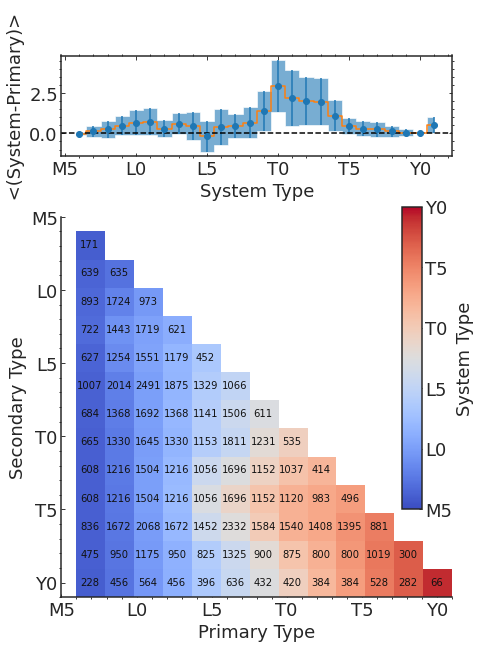

In [25]:
fig, ax=plt.subplots(figsize=(10*0.7, 10*0.7))
wisps.plot_annotated_heatmap(ax, df, 14, ['prim', 'sec', 'sys'], cmap='coolwarm', 
                           annotate='number', vmin=df.sys.min(), vmax=df.sys.max(), textsize=10)
#df.plot.hexbin(x='prim', y='sec', C='sys', reduce_C_function=np.nanmedian, gridsize=15, cmap='coolwarm', ax=ax)
#plot_annotated_heatmap(ax, data, gridpoints, columns, cmap='viridis', 
#                           annotate=False, vmin=0.0, vmax=1.0)
ax.set_xlabel('Primary Type', fontsize=18)
ax.set_ylabel('Secondary Type', fontsize=18)
ax.minorticks_on()

ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.set_yticks([15, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.tick_params(which='minor',direction='out')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cax = fig.add_axes([0.8, 0.3, .04, 0.6])
norm= matplotlib.colors.Normalize(vmin=15,vmax=40)
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap='coolwarm')
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_ylabel(r'System Type', fontsize=18)
cbar.ax.set_yticks([15, 20, 25, 30, 35, 40])
cbar.ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

cax2 = fig.add_axes([0.125, 1.0, 0.775, 0.2])
cax2.set_xlabel('System Type', fontsize=18)
cax2.set_ylabel(r' <(System-Primary)> ', fontsize=18)
#plt.tight_layout()

#sns.kdeplot(df.prim, df.sys,  ax=ax1, shade=False)
c=cax2.errorbar(acc.index, acc.sys_difference, yerr=acc.sys_difference_std, fmt='o')
cax2.step(acc.index, acc.sys_difference, where='mid')
cax2.fill_between(acc.index, acc.sys_difference-acc.sys_difference_std, \
                  acc.sys_difference+acc.sys_difference_std, alpha=0.6,  step="mid")
#ax1.set_xlabel('Primary', fontsize=18)
#ax1.set_ylabel('System', fontsize=18)
cax2.set_xticks([15,  20, 25, 30, 35, 40])
cax2.set_xticklabels([ 'M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
cax2.axhline(0.0, linestyle='--', color='k')
    

cax2.minorticks_on()

cax2.tick_params(which='minor',direction='out')


plt.savefig(wisps.OUTPUT_FIGURES+'/composite_types.pdf', bbox_inches='tight')

In [26]:
#wisps.OUTPUT_FIGURES+'/composite_types.pdf'

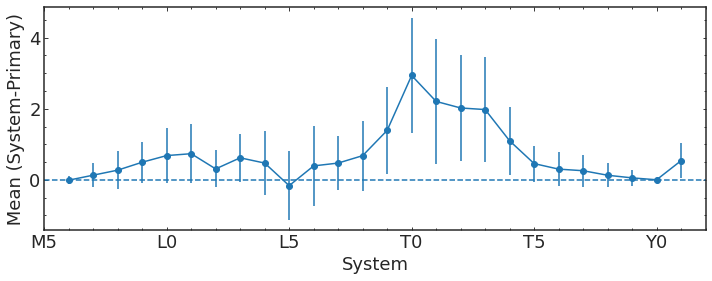

In [27]:
#fig.axes[-1].set_title('Composite', fontsize=18)
#plt.tight_layout()

fig, ax=plt.subplots(figsize=(10, 4))

ax.set_xlim([16, 42])

ax.set_xlabel('System', fontsize=18)
ax.set_ylabel(r' Mean (System-Primary) ', fontsize=18)
#plt.tight_layout()

#sns.kdeplot(df.prim, df.sys,  ax=ax1, shade=False)
c=ax.errorbar(acc.index, acc.sys_difference, yerr=acc.sys_difference_std)
ax.scatter(acc.index, acc.sys_difference)
ax.axhline(0.0, linestyle='--')
#ax1.set_xlabel('Primary', fontsize=18)
#ax1.set_ylabel('System', fontsize=18)

ax.minorticks_on()


ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/binary_excess.pdf', bbox_inches='tight')

In [ ]:
df.dropna().to_csv(wisps.OUTPUT_FILES+'/binary_lookup_table.csv.gz', compression='gzip')

In [38]:
def compute_median_system_type(prim, sec):
    system=(np.nan, np.nan)
    if prim < 16:
        system= (prim, 0.0)
    if prim >= 16:
        boolean=np.logical_and(primary_spts[:,0] == prim, primary_spts[:,1]==sec)
        system= (np.nanmedian(np.vstack(system_spts)[:,0][boolean]), np.nanstd(np.vstack(system_spts)[:,0][boolean]))
    return system

In [35]:
from itertools import combinations
grid= np.arange(10, 43)
combs= np.vstack([(x,y) for x, y in  combinations(grid, 2)])

df2=pd.DataFrame()
df2['prim']=combs[:,0]
df2['sec']=combs[:,1]
df2['sys']=np.nan
df2['sys_unc']=np.nan

In [39]:
#created binarues
spgrid=np.arange(10, 43)
for idx, row in df2.iterrows():
    vals=compute_median_system_type(row.prim, row.sec)
    df2.loc[idx, 'sys']=vals[0]
    df2.loc[idx,'sys_unc']=vals[1]

In [45]:
df2.dropna().to_csv('../data/binary_lookup_table_small.csv')